<a href="https://colab.research.google.com/github/sharpened-ferret/CSC345-Object-Recognition/blob/main/object_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC345: Object Recognition Coursework
This notebook details an object recognition method for a subset of the CIFAR-100 dataset

# CNN Implementation of Object Recognition on a Subset of the CIFAR-100 Dataset

For this implementation, we are using a Convolutional Neural Network to classify images from the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature

First, we need to load the training data files. Here, BASE_PATH points to the folder containing the data files.

In [2]:
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/cw_data/'

trn_images = np.load(BASE_PATH+'/trnImage.npy')
trn_label_fine = np.load(BASE_PATH+'/trnLabel_fine.npy')
trn_label_coarse = np.load(BASE_PATH+'/trnLabel_coarse.npy')

print(f'Images Shape: {trn_images.shape}')
print(f'Images Fine Labels Shape: {trn_label_fine.shape}')
print(f'Images Coarse Labels Shape: {trn_label_coarse.shape}')

Images Shape: (32, 32, 3, 50000)
Images Fine Labels Shape: (50000,)
Images Coarse Labels Shape: (50000,)


The data format provided is not the standard expected for Tensorflow Keras models, so we need to transpose so that the sample number is the first dimension.

In [3]:
print(trn_images.shape)
trn_images = np.transpose(trn_images, (3,0,1,2))
print(trn_images.shape)

(32, 32, 3, 50000)
(50000, 32, 32, 3)


Now that the data is loaded and processed, we define the properties for our CNN and compile it. 

In [4]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding="same"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',padding="same"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu',padding="same"))
model.add(tf.keras.layers.SpatialDropout2D(0.2))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu',padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(100))

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Then we can fit our prepared training data to the compiled model, using an 80:20 training:validation split. 

In [5]:
x_train = trn_images.astype("float32")

history = model.fit(x_train, trn_label_coarse, batch_size=128, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
313/313 [==============================] - 16s 16ms/step - loss: 2.9668 - accuracy: 0.1272 - val_loss: 2.4414 - val_accuracy: 0.2429
Epoch 2/20
313/313 [==============================] - 5s 14ms/step - loss: 2.4578 - accuracy: 0.2462 - val_loss: 2.2241 - val_accuracy: 0.3206
Epoch 3/20
313/313 [==============================] - 4s 14ms/step - loss: 2.2504 - accuracy: 0.3057 - val_loss: 2.1061 - val_accuracy: 0.3468
Epoch 4/20
313/313 [==============================] - 4s 14ms/step - loss: 2.1135 - accuracy: 0.3489 - val_loss: 1.8841 - val_accuracy: 0.4121
Epoch 5/20
313/313 [==============================] - 4s 14ms/step - loss: 1.9825 - accuracy: 0.3892 - val_loss: 1.7807 - val_accuracy: 0.4464
Epoch 6/20
313/313 [==============================] - 5s 15ms/step - loss: 1.8696 - accuracy: 0.4220 - val_loss: 1.7057 - val_accuracy: 0.4687
Epoch 7/20
313/313 [==============================] - 5s 14ms/step - loss: 1.7688 - accuracy: 0.4515 - val_loss: 1.7098 - val_accuracy: 0.470

Graphs of the Model's performance during training:

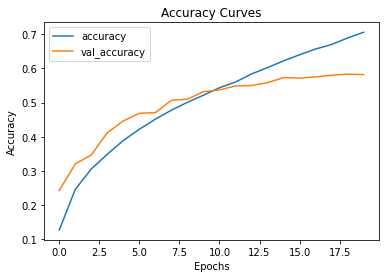

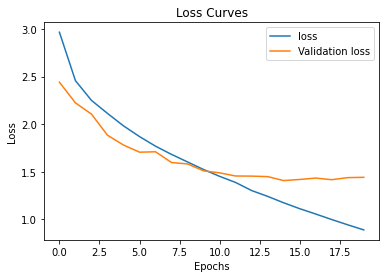

In [6]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Accuracy Curves")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Loss Curves")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

To test our model, we can now load and prepare the test data, and run an evaluation function. 

In [7]:
tst_images = np.load(BASE_PATH+'/tstImage.npy')
tst_label_fine = np.load(BASE_PATH+'/tstLabel_fine.npy')
tst_label_coarse = np.load(BASE_PATH+'/tstLabel_coarse.npy')

tst_images = np.transpose(tst_images, (3,0,1,2))
tst_images = tst_images.astype("float32")

model.evaluate(tst_images, tst_label_coarse, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 1.4276 - accuracy: 0.5795


[1.4276225566864014, 0.5795000195503235]